In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_reg_train = df_ames_train[['Overall Qual','Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add', 'Full Bath','SalePrice']]

In [4]:
df_ames_reg_train.shape

(2051, 10)

In [5]:
df_ames_reg_train.isna().sum()

Overall Qual      0
Neighborhood      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
SalePrice         0
dtype: int64

In [6]:
df_ames_reg_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
df_ames_reg_train.isna().sum()

Overall Qual      0
Neighborhood      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
SalePrice         0
dtype: int64

In [8]:

X = df_ames_reg_train[['Overall Qual','Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add', 'Full Bath']]
y = df_ames_reg_train['SalePrice']
    

In [9]:
X.shape

(2049, 9)

In [10]:
y.shape

(2049,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train.dtypes

Overall Qual        int64
Neighborhood       object
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
dtype: object

In [13]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [14]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [15]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [16]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'Overall Qual'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [17]:
preds= pipe3.predict(X_test)

In [18]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [19]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Overall Qual_1',
       'Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4',
       'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7',
       'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10',
       'Gr Liv Area', 'Garage Cars', '

In [20]:
pipe3.named_steps['linearregression'].coef_

array([ -923.76538615, -1751.7754622 , -2620.63847556,  -953.03757041,
        3078.0234939 ,   164.23051495,  4414.34363688, -4026.53915293,
       -1529.78512305,  -839.88163207,  3857.91268947, -2667.8490995 ,
        -779.9720828 , -2483.19703482,  -398.6657849 ,  -894.28502172,
       -1834.88070013,  -103.88589135,  6058.23067491,  6857.42117375,
       -4952.61713729, -1573.87483505, -1275.6795797 , -1337.62207777,
         398.4555826 ,  6257.07704973,  2710.78396958,  2144.99987948,
       -1187.46272683, -2709.84834896, -4335.64268097, -6496.84221126,
       -8191.97379548, -4308.59130025,   374.78172866,  9080.16957901,
       18845.44651796, 11895.92795919, 22624.07508292,  8556.64667581,
        6333.63797405,   734.7868896 ,  6072.51591191,  6960.6452501 ,
        -199.28501024])

In [21]:
pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))

,0,1
0,Neighborhood_Blmngtn,-923.765386
1,Neighborhood_Blueste,-1751.775462
2,Neighborhood_BrDale,-2620.638476
3,Neighborhood_BrkSide,-953.037570
4,Neighborhood_ClearCr,3078.023494
5,Neighborhood_CollgCr,164.230515
6,Neighborhood_Crawfor,4414.343637
7,Neighborhood_Edwards,-4026.539153
8,Neighborhood_Gilbert,-1529.785123
9,Neighborhood_Greens,-839.881632


The Overall Qual feature coefficients just don't make sense.  I am going to pull this out of the model.

In [22]:
residuals = preds - y_test
residuals

124     -4312.203171
203     20959.757345
613     -7923.381301
270    -38572.062399
1161   -47603.720932
            ...     
1998   -21077.856508
416      5681.499220
915    -40731.269947
1264    -1278.557113
798      5772.641713
Name: SalePrice, Length: 513, dtype: float64

In [23]:
#Evaluate my metrics
print('Linear Regression Model #3 w/Categorical Vars & More: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #3 w/Categorical Vars & More: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #3 w/Categorical Vars & More: R2:', r2_score(y_test, preds))

Linear Regression Model #3 w/Categorical Vars & More: MAE: 19555.79444918622
Linear Regression Model #3 w/Categorical Vars & More: MSE: 914179160.44982
Linear Model #3 w/Categorical Vars & More: R2: 0.8657077789094929


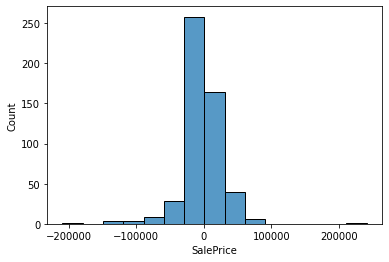

In [24]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

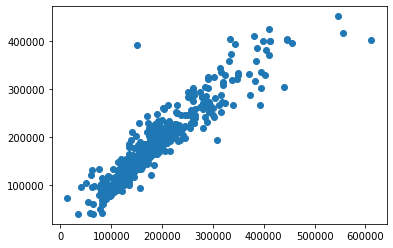

In [25]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

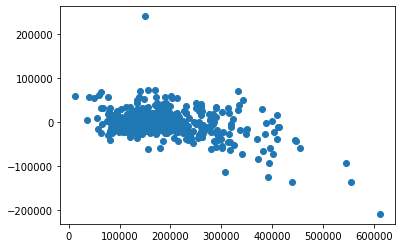

In [26]:
plt.scatter(y_test, residuals);


In [27]:
#Now, I want to use my Linear Regression model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [28]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [33]:
#Pull off only the data I need
df_mini_lreg3_test = df_ames_test[['Overall Qual','Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add', 'Full Bath']]

In [34]:
#Yay!  No missing data here!
df_mini_lreg3_test.isna().sum()

Overall Qual      0
Neighborhood      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
dtype: int64

In [37]:
X_mini_lreg3_test = df_mini_lreg3_test

In [39]:
preds_lr3_kag = pipe3.predict(X_mini_lreg3_test)

In [40]:
df_ames_test['SalePrice'] = preds_lr3_kag

In [41]:
df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/predictions_lr3.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [42]:
df_kaggle = pd.read_csv('./datasets/predictions_lr3.csv')

In [43]:
df_kaggle.head(2)

,Id,SalePrice
0,2658,139979.717686
1,2718,195137.323134
